In [1]:
#import libs
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
import scipy.fftpack as fft
import scipy.io.wavfile as wav
import IPython.display as ipd
import time
import os
import sys
import math
import cmath
import random

import daslib
from daslib import DasSignal, DasEnviroment


In [2]:
s = daslib.DasSignal.load_from_file("Z:/DAS/2021-11-30_Medidas/medida_211130_11_55_19.mat")


In [3]:
def plot_vehicle_detections(time_series, vehicle_count, vehicle_positions):
    plt.figure(figsize=(12, 6))
    plt.plot(time_series, label='Señal de deformación')

  # Graficar las áreas sombreadas para los vehículos detectados
    for start_position, end_position in vehicle_positions:
        plt.axvline(x=start_position, color='red', linestyle='--')
        plt.axvline(x=end_position, color='green', linestyle='--')
        plt.axvspan(start_position, end_position, color='gray', alpha=0.2)

    plt.xlabel('Tiempo (muestras)')
    plt.ylabel('Señal de deformación')
    plt.legend()
    plt.title(f'Vehículos detectados: {vehicle_count}')
    plt.grid()
    plt.show()

0.0556712667880179
[(25, 105), (1616, 1744), (2951, 3101), (3195, 3347), (3575, 3694), (3925, 4058), (4461, 4605), (4738, 4882), (5128, 5207), (8239, 8302), (8395, 8538), (8708, 8762), (8770, 8915), (9946, 10085), (13528, 13833), (13925, 14154), (14346, 14506), (14714, 14872)]


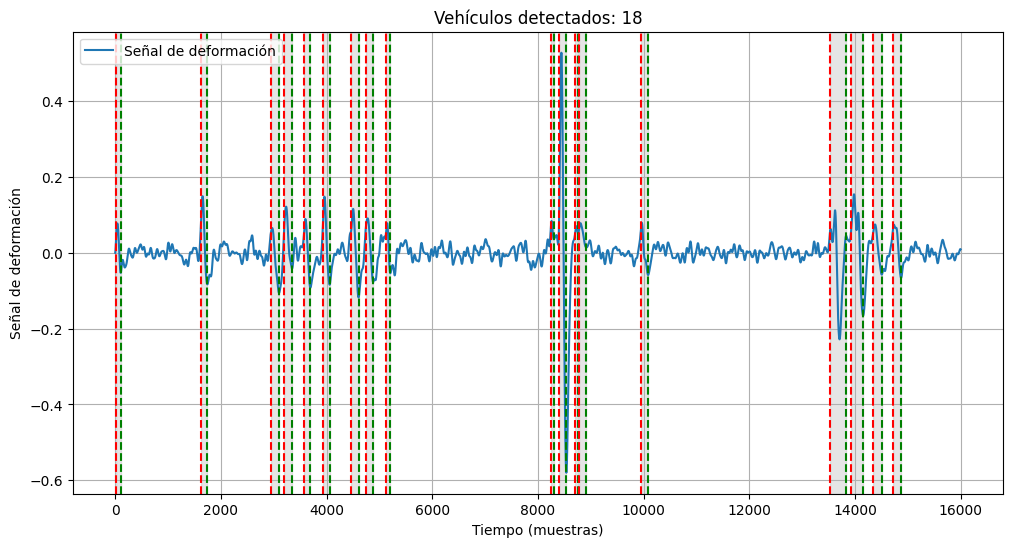

In [4]:
data = s.get_signal()
#select one distance 
signal = data.T[815]
#pass band filter 0.1 to 2
signal = daslib.bandpass_filter(signal, 0.1, 2, 200,2)
#transform de signal to energy
#signals = np.square(signal)
#get signal2 discarding the 50% higher values
signal2 = np.sort(signal)
signal2 = signal2[0:int(len(signal2)/2)]
#get std as threshold and print it
threshold = np.std(signal2)
print(threshold)

sigma = 5  # Parámetro de suavizado
dt = 1 / 200  # Paso de tiempo para la derivada numérica

vehicle_count, vehicle_positions = daslib.helpers.detect_vehicles_from_time_series(signal, threshold, 1, sigma, dt,0.01,0.001)
#vehicle_count, vehicle_positions = daslib.helpers.detect_vehicles_advanced(signal, 1, 200, 2, 100)
print (vehicle_positions)
plot_vehicle_detections(signal, vehicle_count, vehicle_positions)

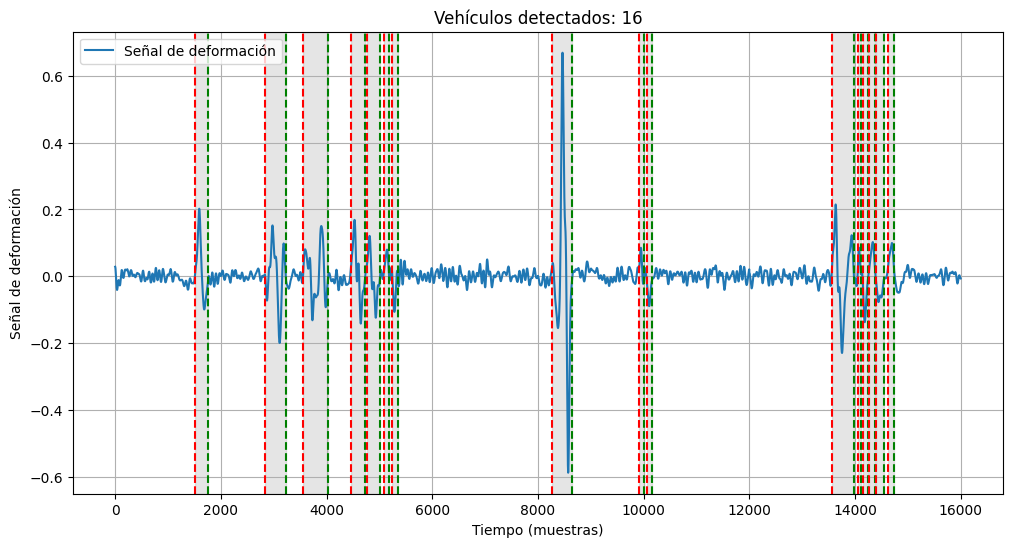

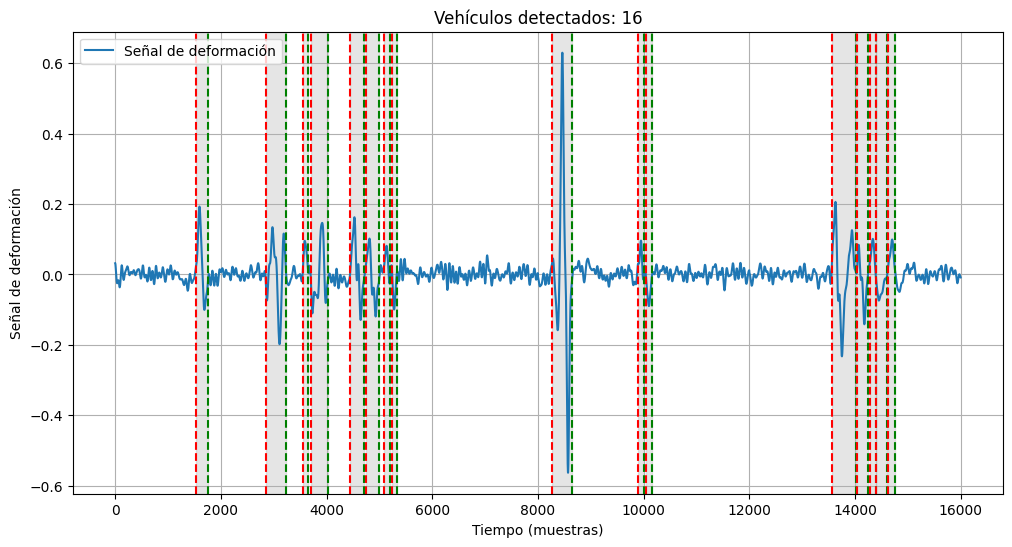

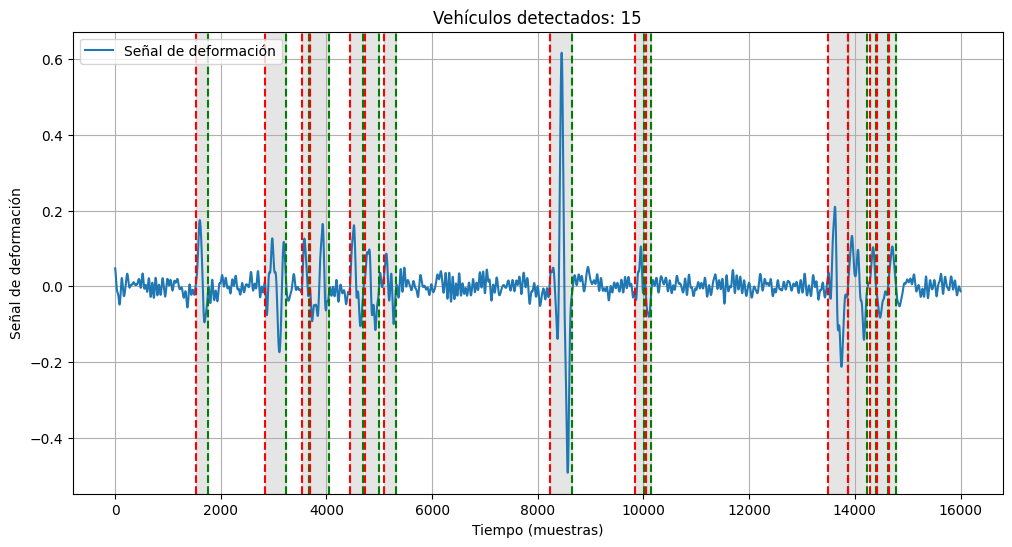

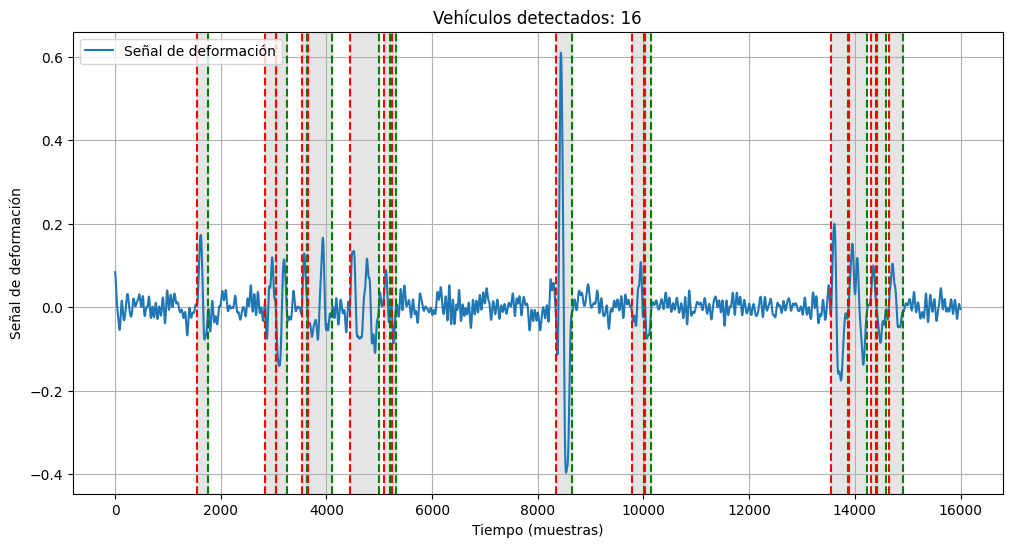

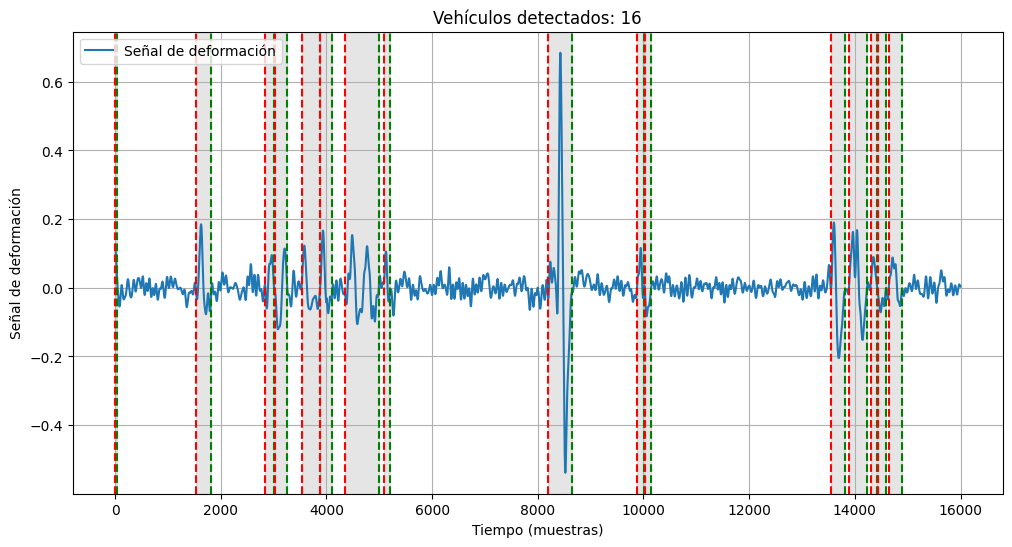

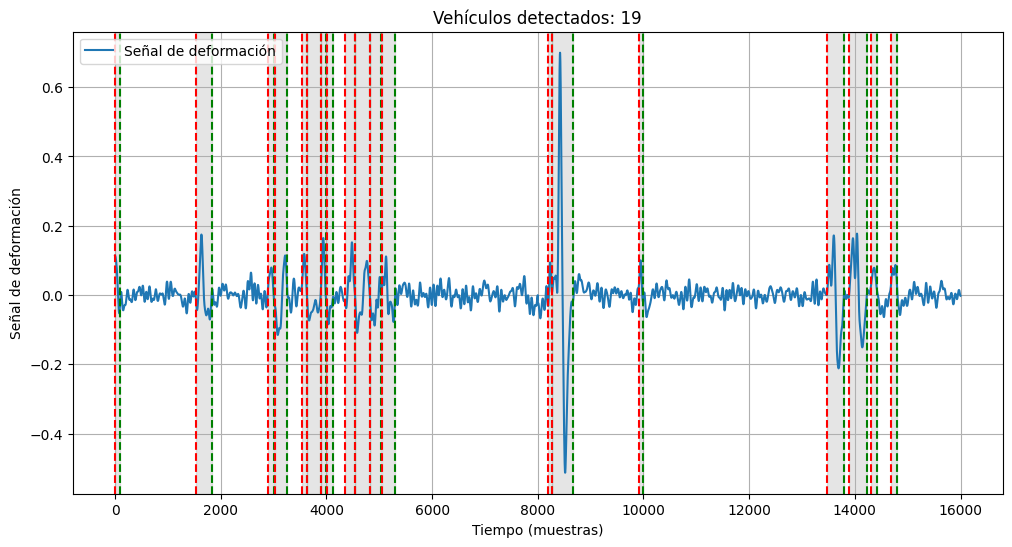

In [5]:
#process signals from 700 to 900 and append the signals to a csv file
#plot all signals
for i in range(810,816):
    signal = data.T[i]
    signals = np.square(signal)
    signal2 = np.sort(signals)
    signal2 = signal2[0:int(len(signal2)/2)]
    threshold = 2*np.std(signal2)
    vehicle_count, vehicle_positions = daslib.helpers.detect_vehicles_from_time_series(signals, threshold, 1, sigma, dt,0.01,0.001)
    #vehicle_count, vehicle_positions = daslib.helpers.detect_vehicles_advanced(signal, 1, 200, 2, 100)
    #print (vehicle_positions)
    plot_vehicle_detections(signal, vehicle_count, vehicle_positions)
    if vehicle_count > 0:
        #foreach vehicle append vehicle positions signal to csv file
        for start_position, end_position in vehicle_positions:
            #append signal as a line to a csv file
            with open('Z:/DAS/2021-11-30_Medidas/medida_211130_11_55_19.csv', 'a') as f:
                f.write(f'{i},{start_position},{end_position}')


                        
            


            


